<a href="https://colab.research.google.com/github/bismanonly1/Projects_ML/blob/main/Task6_Real_Estate_Price_Prediction(Bisman).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Real Estate House Prices

## This task is done to build a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score

### Read the csv data into a pandas dataframe and display the first 5 samples

In [ ]:
df = pd.read_csv(r'C:\Users\bisma\Downloads\Real estate.csv')
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [ ]:
print((len(df), len(df.columns)))

(414, 8)


### What are the features available in the dataset?

In [ ]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

### Check if any features have missing data

In [ ]:
missing = df.isnull().sum()
missing[missing>0]
missing

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [ ]:
features = df.groupby('No')[['X1 transaction date','X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']].sum().reset_index()
features = features.sort_values(by='No')
features

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [ ]:
features1 = df.groupby('No')['Y house price of unit area'].sum().reset_index()
features1 = features1.sort_values(by='No')
features1

,No,Y house price of unit area
0,1,37.9
1,2,42.2
2,3,47.3
3,4,54.8
4,5,43.1
...,...,...
409,410,15.4
410,411,50.0
411,412,40.6
412,413,52.5


### Split the dataset into train and test data

In [ ]:
X = df.drop(columns=['Y house price of unit area'])
y = df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (331, 7)
X_test shape: (83, 7)
y_train shape: (331,)
y_test shape: (83,)


### Choose the model (Linear Regression)

In [ ]:
model = LinearRegression()

### Create an Estimator object

In [ ]:
class LinearRegressionEstimator(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.model = LinearRegression()
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    def predict(self, X):
        return self.model.predict(X)
    def get_coefficients(self):
        return self.model.coef_
estimator = LinearRegressionEstimator()

### Train the model

In [ ]:
estimator.fit(X_train, y_train)


LinearRegressionEstimator()

### Apply the model

In [ ]:
y_pred = estimator.predict(X_test)
y_pred

array([47.04645871, 40.40783016, 43.37463978, 39.20600382, 26.62817953,
       45.8923956 , 44.33888897, 46.74448468, 24.43235155, 55.06258487,
       34.60848974, 36.92386329, 36.76420984, 24.30494918, 35.79519845,
       33.44810036, 44.24993318, 44.98654734, 29.18096544, 44.80711275,
        1.15259949, 36.10694406, 47.26486776, 45.90792727, 10.96198835,
       38.69069634, 12.57701679, 43.61237869, 35.7142565 , 37.55475044,
       14.14012034, 40.46209983, 35.90891223, 28.5174525 , 47.38286733,
       30.9022379 , 50.43545093, 12.92669013, 48.95222574, 39.27068588,
       39.3872837 , 40.09381011, 48.20107097, 37.08010208, 39.54765933,
       47.348201  , 43.3815801 , 21.07747224, 47.05299802, 44.57951775,
       48.24233055, 48.12297596, 41.42189435, 42.25141469, 36.32214409,
       15.69024514, 37.64733588, 35.12221291, 29.08561558, 46.86297981,
       32.07763941, 33.25961566, 15.22965501,  9.01697131,  9.37929873,
       33.78712833, 29.59931587, 47.50139803, 33.81312917, 31.84

### Display the coefficients

In [ ]:
coefficients = estimator.get_coefficients()
coefficients

array([-5.61695287e-03,  5.40743502e+00, -2.67827999e-01, -4.81543315e-03,
        1.08114445e+00,  2.26048799e+02, -3.01254914e+01])

### Find how well the trained model did with testing data

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.6745228670351053

### Plot House Age Vs Price
#### Hint: Use regplot in sns

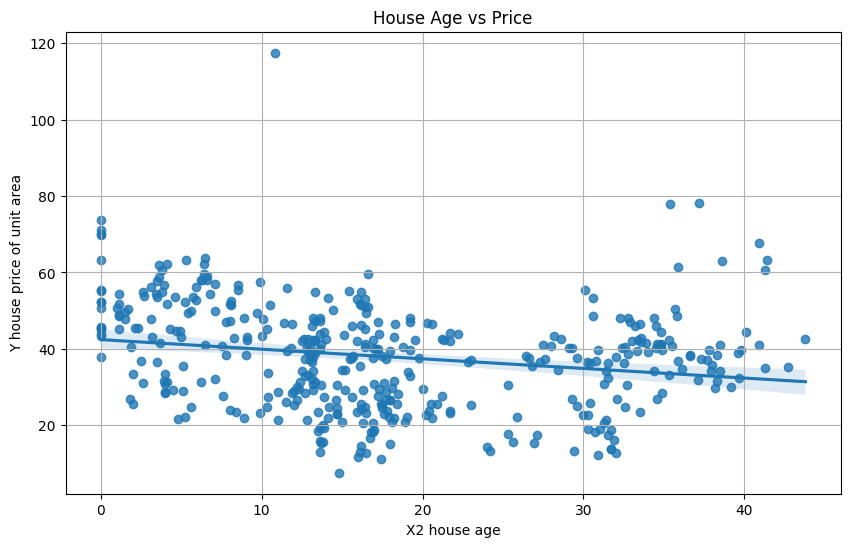

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['X2 house age'], y=df['Y house price of unit area'])
plt.title('House Age vs Price')
plt.grid(True)
plt.show()

### Plot Distance to MRT station Vs Price

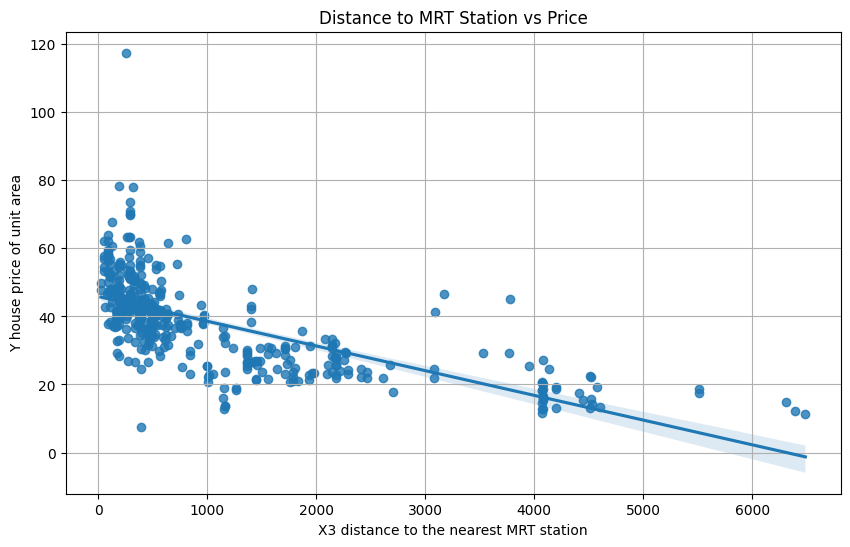

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(y=df['Y house price of unit area'], x=df['X3 distance to the nearest MRT station'])
plt.title('Distance to MRT Station vs Price')
plt.grid(True)
plt.show()

### Plot Number of Convienience Stores Vs Price

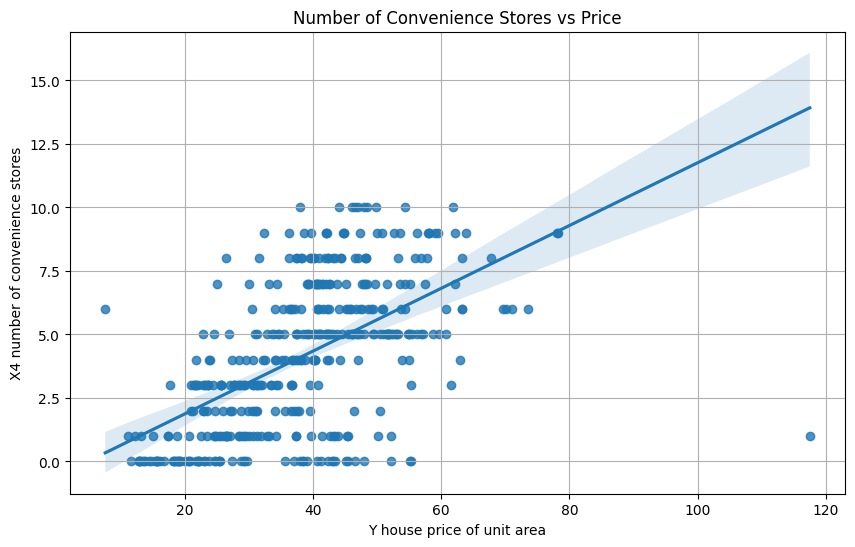

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['Y house price of unit area'], y=df['X4 number of convenience stores'])
plt.title('Number of Convenience Stores vs Price')
plt.grid(True)
plt.show()